## Gather

**1. The WeRateDogs Twitter archive**

In [1]:
import pandas as pd
import numpy as np

In [2]:
twitter_archives = pd.read_csv('twitter-archive-enhanced.csv')

** 2. The Tweet image predictions **

In [3]:
import requests
from io import BytesIO

In [4]:
data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
image_predictions = pd.read_csv(BytesIO(data.content), sep = '\t')

In [6]:
image_predictions.to_csv('image-predictions.tsv', sep='\t', )

**3. Retweet count and favorite count data**

In [8]:
import json
import tweepy

consumer_key = '' consumer_secret = '' access_token = '' access_secret = '' auth = tweepy.OAuthHandler(consumer_key, consumer_secret) auth.set_access_token(access_token, access_secret) api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True) with open("tweet_json.txt", "w") as outfile: for tweet_id in twitter_archives['tweet_id']: try: tweet = api.get_status(tweet_id, tweet_mode = 'extended') json.dump(tweet._json, outfile) outfile.write("\n") except Exception as e: print(str(tweet_id) + str(e))

In [15]:
data = []
with open('tweet_json.txt', 'r') as readfile: 
    tweet_json = readfile.readline()
    while tweet_json:
        tweet_dict = json.loads(tweet_json)
        data.append(tweet_dict)
        tweet_json = readfile.readline()
        
tweet_api_data = pd.DataFrame.from_dict(data)

## Assess

In [16]:
tweet_api_data

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,Mon Nov 16 00:24:50 +0000 2015,666049248165822465,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,False,False,en,NaN,NaN,NaN,NaN
2350,Mon Nov 16 00:04:52 +0000 2015,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,False,False,en,NaN,NaN,NaN,NaN
2351,Sun Nov 15 23:21:54 +0000 2015,666033412701032449,666033412701032449,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,False,False,en,NaN,NaN,NaN,NaN
2352,Sun Nov 15 23:05:30 +0000 2015,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,False,False,en,NaN,NaN,NaN,NaN


In [17]:
tweet_api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [18]:
tweet_api_data.describe()

,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count,favorite_count,quoted_status_id
count,2.354000e+03,7.800000e+01,7.800000e+01,2354.000000,2354.000000,2.900000e+01
mean,7.426978e+17,7.455079e+17,2.014171e+16,3164.797366,8080.968564,8.162686e+17
std,6.852812e+16,7.582492e+16,1.252797e+17,5284.770364,11814.771334,6.164161e+16
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,0.000000,6.721083e+17
25%,6.783975e+17,6.757419e+17,3.086374e+08,624.500000,1415.000000,7.888183e+17
50%,7.194596e+17,7.038708e+17,4.196984e+09,1473.500000,3603.500000,8.340867e+17
75%,7.993058e+17,8.257804e+17,4.196984e+09,3652.000000,10122.250000,8.664587e+17
max,8.924206e+17,8.862664e+17,8.405479e+17,79515.000000,132810.000000,8.860534e+17


In [19]:
tweet_api_data.possibly_sensitive.value_counts()

False    2211
Name: possibly_sensitive, dtype: int64

In [20]:
tweet_api_data.possibly_sensitive_appealable.value_counts()

False    2211
Name: possibly_sensitive_appealable, dtype: int64

In [21]:
tweet_api_data.duplicated(subset=['id']).any()

False

In [22]:
tweet_api_data.entities[0]

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [23]:
tweet_api_data.extended_entities[0]

{'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
    'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [24]:
tweet_api_data[tweet_api_data.retweeted_status.notnull()].retweeted_status[31]

{'created_at': 'Sat Jul 15 02:44:07 +0000 2017',
 'id': 886053734421102592,
 'id_str': '886053734421102592',
 'full_text': '12/10 #BATP https://t.co/WxwJmvjfxo',
 'truncated': False,
 'display_text_range': [0, 11],
 'entities': {'hashtags': [{'text': 'BATP', 'indices': [6, 11]}],
  'symbols': [],
  'user_mentions': [],
  'urls': [{'url': 'https://t.co/WxwJmvjfxo',
    'expanded_url': 'https://twitter.com/dog_rates/status/886053434075471873',
    'display_url': 'twitter.com/dog_rates/stat…',
    'indices': [12, 35]}]},
 'source': '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 19607400,
  'id_str': '19607400',
  'name': "Oakland A's 🌳🐘⚾️",
  'screen_name': 'Athletics',
  'location': 'Oakland, CA',
  'description': 'Official Twitter of the four-time World Series champion Oakland Athletic

In [25]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [27]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [28]:
image_predictions.duplicated(subset=['tweet_id']).any()

False

In [29]:
image_predictions.duplicated(subset=['jpg_url']).any()

True

In [30]:
twitter_archives

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [31]:
twitter_archives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [32]:
twitter_archives.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [33]:
twitter_archives.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [34]:
twitter_archives.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [35]:
twitter_archives.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [36]:
twitter_archives.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [37]:
twitter_archives[twitter_archives['rating_numerator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [38]:
twitter_archives[twitter_archives['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


**Quality**

tweet_api_data table

1. Have unrelated column like user, favorited, retweeted which is based on the personal user information who obtain the data from API
2. Have column in which all data is null: contributors, coordinates, geo, place, quoted status id, and quoted status id str
3. Source column contain the whole html tag <a href=" ... " >
4. Possibly_sensitive and possibly_sensitive_appealable column is all zero

image_predictions table

p1, p2, p3 whitespace usage is not standardized, some uses -, some uses _, some are capitalized, some are not.

twitter_archive table

1. the dog name may not be accurate, some names are a or an
2. the dog name have None string that should be a null instead
3. Column name doggo, floofer, puppo, and pupper has value either None or its column name
4. Some rating are wrong, it is marked by the denominator is not 10. One of the tweets sound like this : "This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10". However, the captured rating was 7/11 instead of 10/10
5. Some rating_numerator also captures wrong data, spotted by having the value less than 10.
6. the timestamp should be put as datetime instead of string

**Tidiness**

1. the p1_dog, p2_dog, p3_dog contain redundancy since the p1, p2, p3 is not unique throughout the row in image_predictions
2. created_at / timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id are duplicated in tweet_api_data table and twitter_archive table
3. tweet_api_data and image_predictions should be part of twitter_archive table
4. Entities data seems to contain image information which are already contained in the twitter archive data, like the image_url and extended url
5. Extended entities column contains duplicate information of the entities column

## Clean

In [39]:
twitter_archives_clean = twitter_archives.copy()
image_predictions_clean = image_predictions.copy()
tweet_api_data_clean = tweet_api_data.copy()

## Tidiness

**Some tweets in the tweet_api_data are retweets**

Create a dataframe for the real tweet data from the retweeted_status, remove tweets that are actually a retweet, remove retweeted_status from the tweet_api_data, and concatenate the real tweet data to the tweet_api_data.

In [40]:
real_tweet_data_from_retweet = tweet_api_data_clean[tweet_api_data_clean.retweeted_status.notnull()].retweeted_status
real_tweet_data_from_retweet = pd.DataFrame(real_tweet_data_from_retweet.tolist())

In [41]:
tweet_api_data_clean = tweet_api_data_clean[tweet_api_data_clean.retweeted_status.isnull()]

tweet_api_data_clean = tweet_api_data_clean.drop(['retweeted_status'], axis=1)

In [42]:
tweet_api_data_clean = tweet_api_data_clean.append(real_tweet_data_from_retweet)

**Test**

In [43]:
tweet_api_data_clean.shape[0] == tweet_api_data.shape[0]

True

**The p1_dog, p2_dog, p3_dog contain redundancy since the p1, p2, p3 is not unique throughout the row in image_predictions**

**Define**

Put the p1_dog, p2_dog, p3_dog in separate table called prediction_is_dog_clean with columns prediction and is_dog. After that, remove the p1_dog, p2_dog, p3_dog from the image_predictions data

**Code**

In [44]:
prediction_is_dog_clean = pd.DataFrame()
temp = pd.DataFrame()

In [45]:
col_to_put_in = ['p1','p2', 'p3']

for col in col_to_put_in:
    temp = pd.DataFrame()
    temp['prediction'] = image_predictions_clean[col]
    temp['is_dog'] = image_predictions_clean[col+'_dog']
    if (col == 'p1'):
        prediction_is_dog_clean = temp
    else:
        prediction_is_dog_clean.append(temp)

In [46]:
prediction_is_dog_clean.drop_duplicates(inplace=True)

In [47]:
image_predictions_clean = image_predictions_clean.drop(['p1_dog', 'p2_dog', 'p3_dog'], axis=1)

**Test**

In [48]:
prediction_is_dog_clean.duplicated(['prediction']).any()

False

In [49]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p2        2075 non-null   object 
 6   p2_conf   2075 non-null   float64
 7   p3        2075 non-null   object 
 8   p3_conf   2075 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 146.0+ KB


created_at / timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id are duplicated in tweet_api_data table and twitter_archive table

**Define**

Drop the timestamp, source, text, in_reply_to_status_id, in_reply_to_user_id in the twitter_archives

**Code**

In [50]:
twitter_archives_clean = twitter_archives_clean.drop([
    'timestamp', 'text', 'source', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

**Test**

In [51]:
all_columns = pd.Series(list(tweet_api_data_clean) + list(twitter_archives_clean))
all_columns[all_columns.duplicated()]

Series([], dtype: object)

**tweet_api_data and image_recognition should be part of twitter_archive**

**Define**

Merge the tweet_api_data and image_recognition table to the twitter_archive table, joining on tweet_id and id.

**Code**

In [52]:
twitter_archives_clean = pd.merge(tweet_api_data_clean, twitter_archives_clean,
                            left_on='id', right_on='tweet_id', how='right')

In [53]:
twitter_archives_clean = twitter_archives_clean.drop([
    'tweet_id'], axis=1)

In [54]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [55]:
twitter_archives_clean = pd.merge(twitter_archives_clean, image_predictions_clean, left_on='id', right_on='tweet_id', how='left')

**Test**

In [56]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 50 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

## Quality

Remove columns whose values are all empty or similar

**Define**

Drop column user, favorited, retweeted, contributors, coordinates, geo, place, quoted status id, and quoted status id str

**Code**

In [57]:
twitter_archives_clean = twitter_archives_clean.drop([
    'user', 'favorited', 'retweeted', 'contributors', 
    'coordinates', 'geo', 'place', 'quoted_status_id', 
    'quoted_status_id_str'], axis=1)

**Test**

In [58]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

**twitter_archives_clean: Column name doggo, floofer, puppo, and pupper has value either None or its column name**

**Define**

Change the value of the column names mentioned above to be True or False

**Code**

In [59]:
def use_true_or_false_for_column(archive, col_name):
    if archive[col_name] == col_name:
        return True
    else:
        return False
    
twitter_archives_clean['doggo'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('doggo',), axis=1)
twitter_archives_clean['floofer'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('floofer',), axis=1)
twitter_archives_clean['puppo'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('puppo',), axis=1)
twitter_archives_clean['pupper'] = twitter_archives_clean.apply(
    use_true_or_false_for_column, args=('pupper',), axis=1)

**Test**

In [60]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2330 non-null   object 
 1   id                             2330 non-null   float64
 2   id_str                         2330 non-null   object 
 3   full_text                      2330 non-null   object 
 4   truncated                      2330 non-null   object 
 5   display_text_range             2330 non-null   object 
 6   entities                       2330 non-null   object 
 7   extended_entities              2137 non-null   object 
 8   source                         2330 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

**possibly_sensitive and possibly_sensitive_appealable contain same value for all row in twitter_archives**

**Define**

Drop the possibly_sensitive and possibly_sensitive_appealable column

**Code**

In [61]:
twitter_archives_clean = twitter_archives_clean.drop([
    'possibly_sensitive','possibly_sensitive_appealable'], axis=1)

**Test**

In [62]:
twitter_archives_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2511 entries, 0 to 2510
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_at                  2330 non-null   object 
 1   id                          2330 non-null   float64
 2   id_str                      2330 non-null   object 
 3   full_text                   2330 non-null   object 
 4   truncated                   2330 non-null   object 
 5   display_text_range          2330 non-null   object 
 6   entities                    2330 non-null   object 
 7   extended_entities           2137 non-null   object 
 8   source                      2330 non-null   object 
 9   in_reply_to_status_id       78 non-null     float64
 10  in_reply_to_status_id_str   78 non-null     object 
 11  in_reply_to_user_id         78 non-null     float64
 12  in_reply_to_user_id_str     78 non-null     object 
 13  in_reply_to_screen_name     78 no

**Source column contain the whole html tag <a href=" ... " >**

**Define**

Use regular expression to extract only the href part of the link

**Code**

In [63]:
twitter_archives_clean['source'] = twitter_archives_clean.source.str.extract(r'href="(.+?)"')

**Test**

In [64]:
twitter_archives_clean['source'].value_counts()

http://twitter.com/download/iphone              2182
http://vine.co                                   103
http://twitter.com                                33
https://about.twitter.com/products/tweetdeck      12
Name: source, dtype: int64

**Name of the dog are marked as None instead of nan in twitter_archives_clean table**

**Define**

Replace None to nan

**Code**

In [65]:
twitter_archives_clean.name.replace('None', np.nan, inplace=True)

**Test**

In [66]:
(twitter_archives_clean.name == 'None').any()

False

**Some dog have name a, an, and the in twitter_archives_clean table**

**Define**

Replace 'a', 'an', 'the' to nan

**Code**

In [67]:
twitter_archives_clean.name.replace(['a', 'an', 'the'], np.nan, inplace=True)

**Test**

In [68]:
(twitter_archives_clean.name == 'a').any()

False

**Some rows have invalid rating, with rating numerator less than 10 or denominator not equal to 10**

**Define**

Drop rows with such occurences

**Code**

In [69]:
twitter_archives_clean = twitter_archives_clean[(twitter_archives_clean.rating_numerator >= 10) & (twitter_archives_clean.rating_denominator == 10)]

**Test**

In [70]:
(twitter_archives_clean.rating_numerator < 10).any()

False

In [71]:
(twitter_archives_clean.rating_denominator != 10).any()

False

In [72]:
with open('twitter_archive_master.csv', 'w') as outfile:  
    outfile.write(twitter_archives_clean.to_csv(index=False))
    
with open('predictions_mapping_master.csv', 'w') as outfile:  
    outfile.write(prediction_is_dog_clean.to_csv(index=False))

## Visualize

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
twitter_archives = pd.read_csv('twitter_archive_master.csv')

predictions_mappings = pd.read_csv('predictions_mapping_master.csv')

In [75]:
# Setup function needed
sns.set(rc={'figure.figsize':(11.7,8.27)})
def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

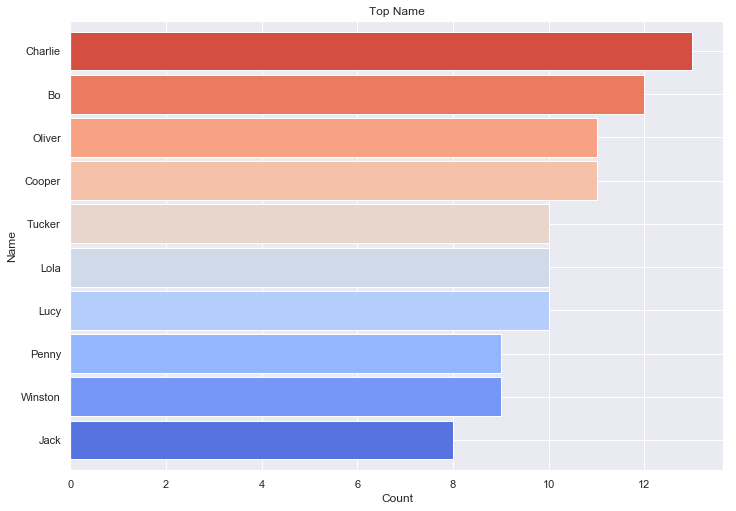

In [76]:
twitter_archives.name.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
plt.title('Top Name')
set_label('Count', 'Name')

Based on the above, it seems that Charlie is the most popular name, followed by Bo.

## Is there a correlation between retweet count and favorite count?

Text(0.5,1,'Favorite vs Retweet Count')

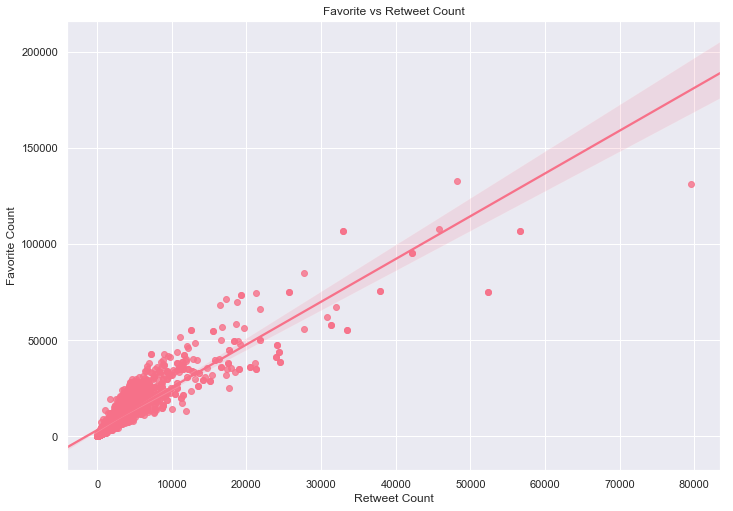

In [77]:
sns.set_palette("husl")
sns.regplot(
    x='retweet_count', 
    y='favorite_count', data=twitter_archives)
set_label("Retweet Count", "Favorite Count")

plt.title('Favorite vs Retweet Count')

From the above, it seems like there could be a correlation between favorite count and retweet count.

## Is there any pattern for the rating given in the tweet?

First we try to look at pattern based on the time the tweet was made.

Text(0.5,1,'The median rating of dog tweet per day')

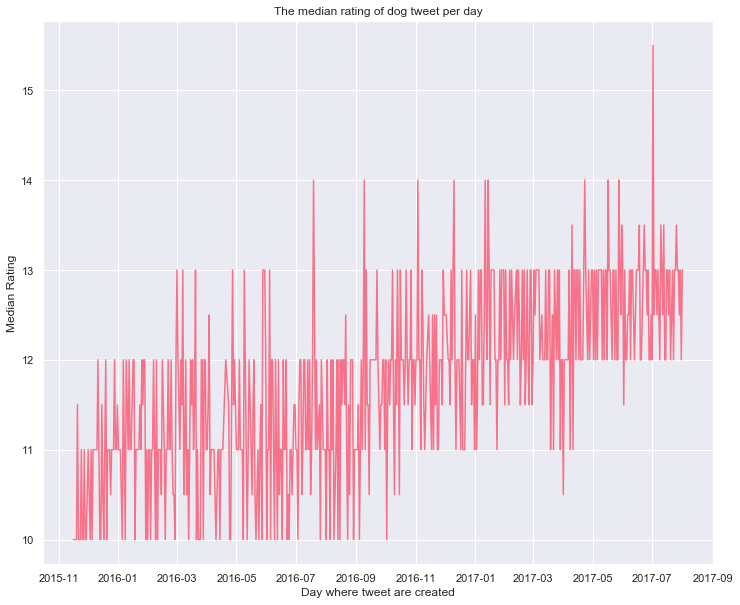

In [78]:
twitter_archives['created_at'] = pd.to_datetime(twitter_archives.created_at)

plt.subplots(figsize=(12,10))
twitter_archives.groupby(twitter_archives['created_at'].dt.date).median()['rating_numerator'].plot()
set_label('Day where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per day')

The above plot, although unclear, seems to indicate an increase in the rating of the dog given. Let's show it more clearly by dividing it to bigger interval.

/Users/mac/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5,1,'The median rating of dog tweet per month')

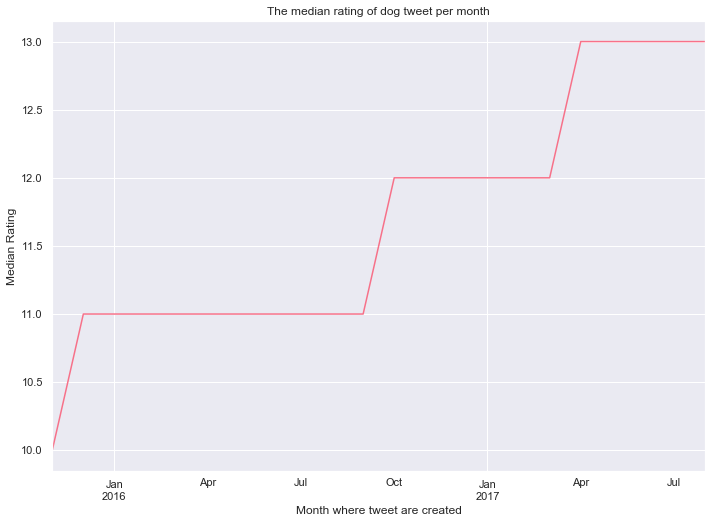

In [79]:
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['rating_numerator'].plot()
set_label('Month where tweet are created', 'Median Rating')
plt.title('The median rating of dog tweet per month')

From the above, it seems like the rating given to dogs increases as time goes by.

## Does @weRateDogs tweets more dog rating as it gains popularity?

Let's first plot the number of tweet data per month.

/Users/mac/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


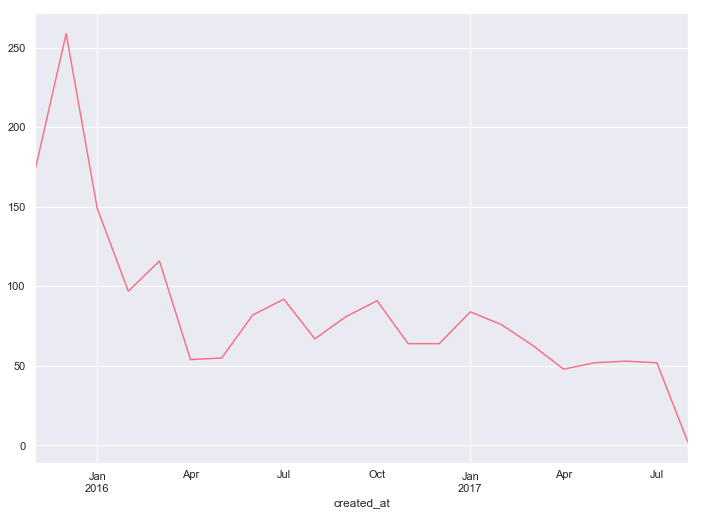

In [80]:
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).count()['id'].plot()

Ignoring the sharp drop in July 2017, which might be due to the time we gather data, the plot above shows that @weRateDogs does not become more active in rating dogs as the month goes by. Actually, the tweet count has tendency to decrease.

## How about the retweet count and the favorite count per month?

To measure the account popularity, it is better to use the median of the retweet count and favorite count instead of the sum, as median is less affected by outlier and the sum may be affected by the number of tweets made per month, which differs each month.

/Users/mac/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,
/Users/mac/anaconda3/lib/python3.6/site-packages/pandas/core/arrays/datetimes.py:1104: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


Text(0.5,1,'Median of Favorite Count and Retweet Count for each month')

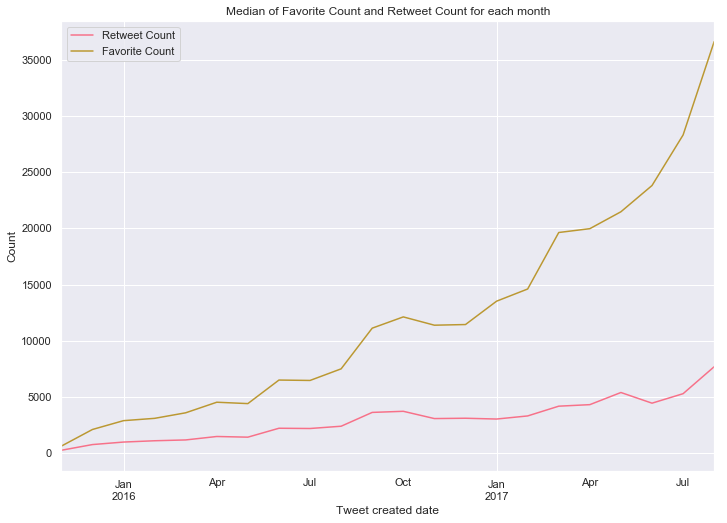

In [81]:
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['retweet_count'].plot(label='Retweet Count')
twitter_archives.groupby(twitter_archives['created_at'].dt.to_period("M")).median()['favorite_count'].plot(label='Favorite Count')

plt.legend()
set_label('Tweet created date', 'Count')
plt.title('Median of Favorite Count and Retweet Count for each month')

From the above, we can see that there is tendency for retweet count and favorite count to increase, despite the decrease of the number of dog rating tweet made.

## How confidence is the image prediction?

Text(0,0.5,'Confidence')

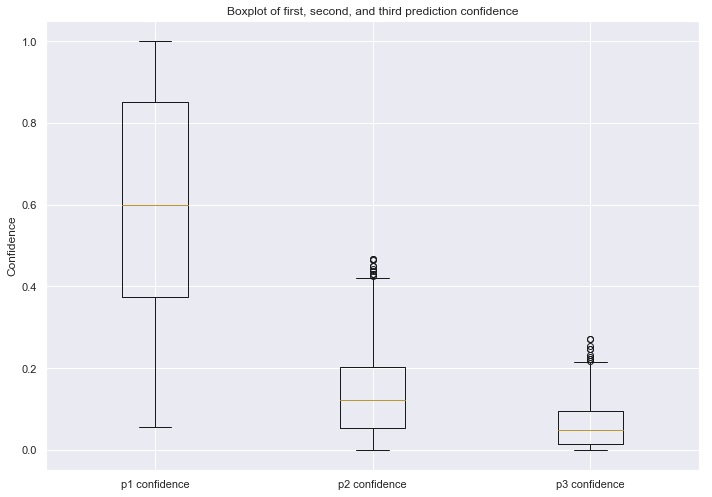

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111)
plot = ax.boxplot([
    twitter_archives.p1_conf[twitter_archives.p1_conf.notnull()],
    twitter_archives.p2_conf[twitter_archives.p2_conf.notnull()],
    twitter_archives.p3_conf[twitter_archives.p3_conf.notnull()]], 
    labels=[
    'p1 confidence', 'p2 confidence', 'p3 confidence'])
plt.title('Boxplot of first, second, and third prediction confidence')
plt.ylabel('Confidence')

From the above, we can see that first prediction tend to have higher confidence than the second and third prediction. We can also see that for the first prediction, the more than 50% of the image has more than 50% confidence.